# Crop Prediction Project
### by Oladotun Usiola

Introduction
- Agriculture plays a crucial role in every country's economy and with the ever increasing human population there's a need to increase food production. Therefore, discovering trends and relationships, and understanding factors (weather/climatic conditions, pesticides usage, soil type, soil pH, etc) that might positively and negatively affect crop yield is essential for crop management, future predictions, addressing food insecurity, and decision making.    

The aim and objective of this crop prediction project is to:
1) perform an Exploratory Data Analysis (EDA) to unravel and discover patterns and relationships between the variables over the year.
2) build an interactive dashboard that displays the relationship between crop yield and pesticides usage over the years based on the continent, country, and crop type.
2) build a machine learning algorithm that can predict the crop yield (hg/ha) based on the independent variables, namely: crop type, average rainfall (mm/year), average temperature, and pesticides usage (tons). 

Data Source
- This dataset was downloaded from kaggle and was obtained through publicly available dataset from FAO (Food and Agriculture Organization) and World Data Bank. 

In [28]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#interactive dashbords
import ipywidgets as widgets
#from IPython.display import display

#data preprocessing models
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

#model building
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor

#hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
#importing files
def crop(filename):
    df = pd.read_csv(filename, index_col=0)
    return df

In [3]:
#read data sets
df = crop("yield_df.csv")

#renaming columns 
df = df.rename(columns={"Area":"Country", "Item":"Crops", "hg/ha_yield":"yield",
                       "average_rain_fall_mm_per_year":"avg_rainfall"})

df.head()

,Country,Crops,Year,yield,avg_rainfall,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            28242 non-null  object 
 1   Crops              28242 non-null  object 
 2   Year               28242 non-null  int64  
 3   yield              28242 non-null  int64  
 4   avg_rainfall       28242 non-null  float64
 5   pesticides_tonnes  28242 non-null  float64
 6   avg_temp           28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.7+ MB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,28242.0,2001.544296,7.051905,1990.00,1995.0000,2001.00,2008.00,2013.00
yield,28242.0,77053.332094,84956.612897,50.00,19919.2500,38295.00,104676.75,501412.00
avg_rainfall,28242.0,1149.055980,709.812150,51.00,593.0000,1083.00,1668.00,3240.00
pesticides_tonnes,28242.0,37076.909344,59958.784665,0.04,1702.0000,17529.44,48687.88,367778.00
avg_temp,28242.0,20.542627,6.312051,1.30,16.7025,21.51,26.00,30.65


In [6]:
df.describe(include='object').transpose()

,count,unique,top,freq
Country,28242,101,India,4048
Crops,28242,10,Potatoes,4276


In [7]:
#checking for missing values
df.isnull().sum()

Country              0
Crops                0
Year                 0
yield                0
avg_rainfall         0
pesticides_tonnes    0
avg_temp             0
dtype: int64

In [8]:
#Assessing the data for duplicated values
df.duplicated().sum()

2310

In [9]:
df.drop_duplicates(inplace=True, ignore_index=True)
df.duplicated().sum()

0

In [10]:
country = df["Country"]

#Print the number of unique crops in the dataset
print(f"{country.nunique()} countries are represented in the dataset")

101 countries are represented in the dataset


In [11]:
country.value_counts()

India         3384
Brazil        1854
Mexico        1280
Australia      966
Pakistan       966
              ... 
Estonia         42
Belgium         39
Bahrain         29
Sudan           28
Montenegro      24
Name: Country, Length: 101, dtype: int64

In [12]:
crop = df["Crops"]

#Print the number of unique crops in the dataset
print(f"A total of {crop.nunique()} crops, \nwhich are {list(crop.unique())}")


A total of 10 crops, 
which are ['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat', 'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams']


- There are seven (7) columns in the dataset, namely: Country, Year, Crop type, Average Rainfall, Average Temperature, Pesticide Usage, and Crop Yield.
- There are 101 countries from different continents present, with India having the highest frequency (most occurring), between the year 1990 to 2013.
- Ten (10) crops were observed during these periods, which are "Maize, Potatoes, Rice, Sorghum, Soybeans, Wheat, Cassava, Sweet potatoes, Yams, and Plantains and others"
- There are no missing data present while duplicated data were dropped.

### Exploratory Data Analysis

Text(0.5, 1.0, 'Crop Frequency')

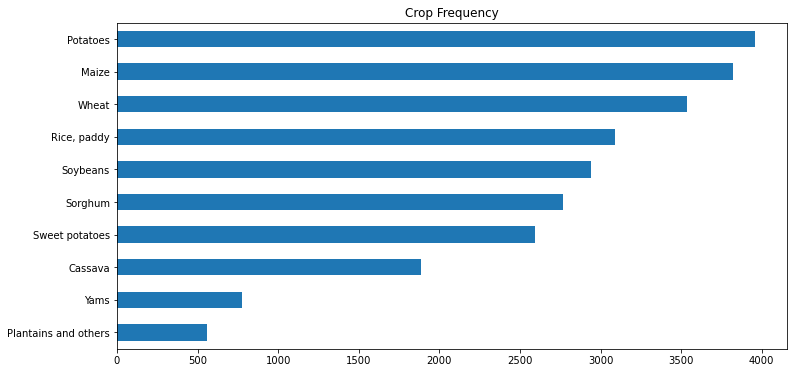

In [13]:
crop.value_counts().sort_values(ascending=True).plot(kind="barh", figsize=(12,6))
plt.title("Crop Frequency")

- The graph above showed that potatoes had the highest occuring frequency, followed by Maize, then Wheat. While Plantains and other crops had the least occurrence in the data.

Crops
Potatoes                198665.725228
Cassava                 145649.692430
Sweet potatoes          119656.515619
Yams                    112105.633075
Plantains and others    106041.320144
Rice, paddy              41296.028470
Maize                    37139.320345
Wheat                    30125.681266
Sorghum                  19099.774729
Soybeans                 16992.190136
Name: yield, dtype: float64


Text(0.5, 1.0, 'Total Crop Yield between 1990 - 2013')

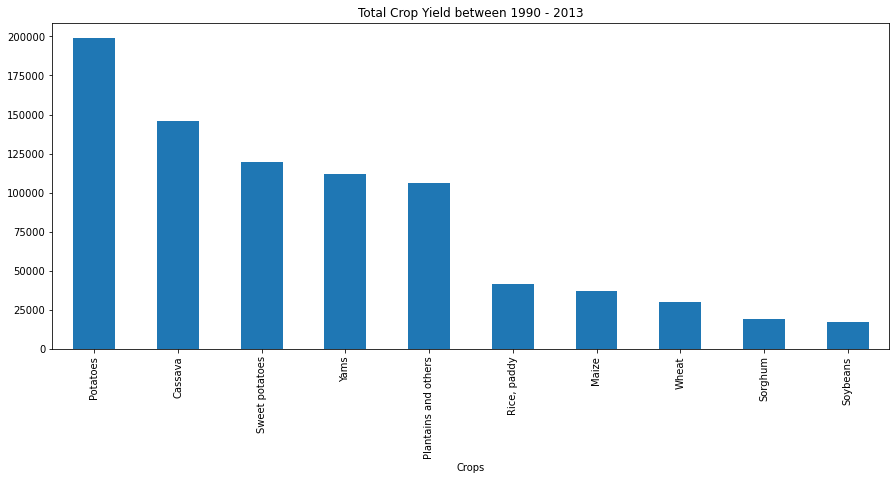

In [14]:
crop_yield = df.groupby(["Crops"])["yield"].mean().sort_values(ascending=False)
print(crop_yield)

plt.figure(figsize=(15,6))
crop_yield.plot(kind="bar")
plt.title("Total Crop Yield between 1990 - 2013")

- Since Potato has the highest occurrence in the dataset, it's expected that it also has the highest yield---even though potatoes are naturally high yield/prolific
- Although Maize has the second highest occurrence, it's one of the least yielding crops.
- Also the top 4 most yielding crops are classified under root and tuber crops. 
- The top 5 most yielding crops are crops with bigger surface area than the Bottom 5 crops

Text(0.5, 1.0, 'Top 10 Most Occuring Countries')

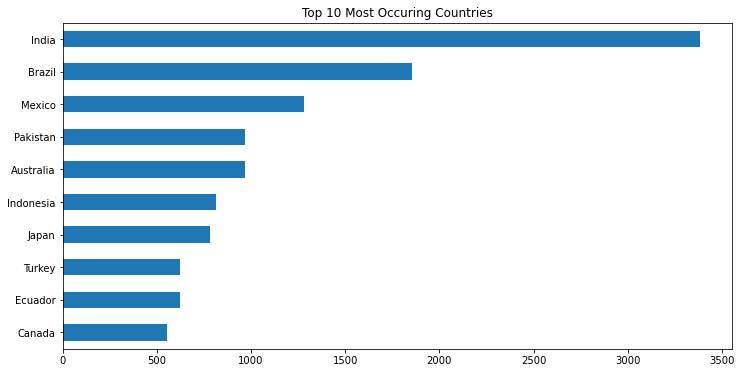

In [15]:
top_10_most_occuring_country = country.value_counts().head(10)
top_10_most_occuring_country.sort_values(ascending=True).plot(kind="barh", figsize=(12,6))
plt.title("Top 10 Most Occuring Countries")

Text(0.5, 1.0, 'Least Occuring Countries')

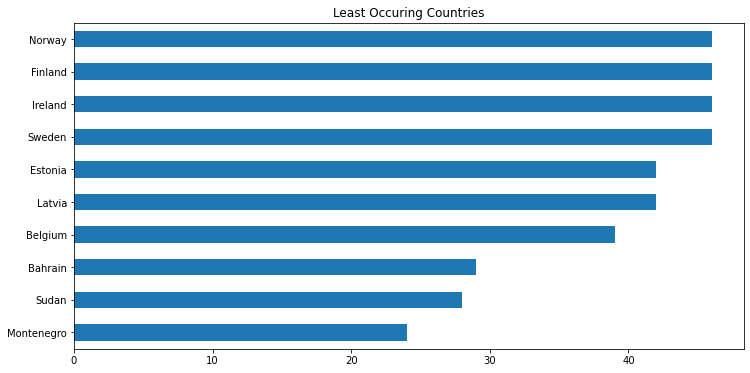

In [16]:
least_10_occuring_country = country.value_counts().tail(10)
least_10_occuring_country.sort_values(ascending=True).plot(kind="barh", figsize=(12,6))
plt.title("Least Occuring Countries")

- While India appeared the most in the dataset, occuring about 3400 times; Montenegro had the least number of occurrence (occuring about 24 times)

<AxesSubplot:>

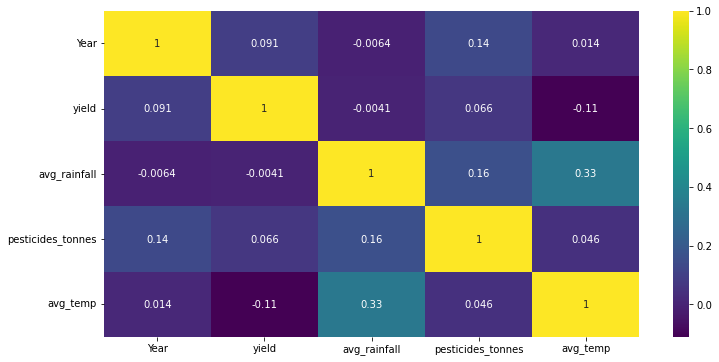

In [17]:
correlation = df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(data=correlation, cmap="viridis", annot=True)

- The correlation graph above showed that there is no variable that is strongly correlated to the dependent variable (Yield).
- The variables with the highest positively correlated value is Average Rainfall and Average Temperature.

<AxesSubplot:>

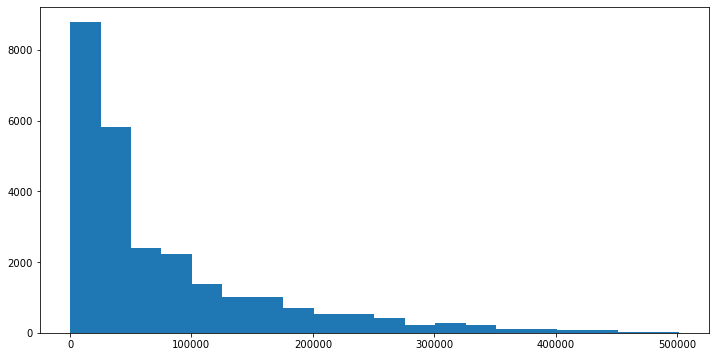

In [18]:
df["yield"].hist(bins=20, grid=False, figsize=(12,6))

- The histogram plot is right skewed

In [29]:
def plot_data(crop, column1):
    plt.figure(figsize=(12,6))
    crop_df = df[df["Crops"] == crop]
    graph_data = crop_df.groupby("Year")[column1].mean()
    graph_data.plot(marker = 'o', color='r', style='-')
    plt.xlabel("Year")
    plt.ylabel(f'{column1}')
    plt.title(f'{column1.title()} of {crop} between 1990 - 2013')
    plt.show()

The def function above helps to show the trend of any selected crop type and a variable over the years.
- The plots below shows the trend of Potatoes across four independent variables (Yield, Pesticides usage, average rainfall, and average temperature)

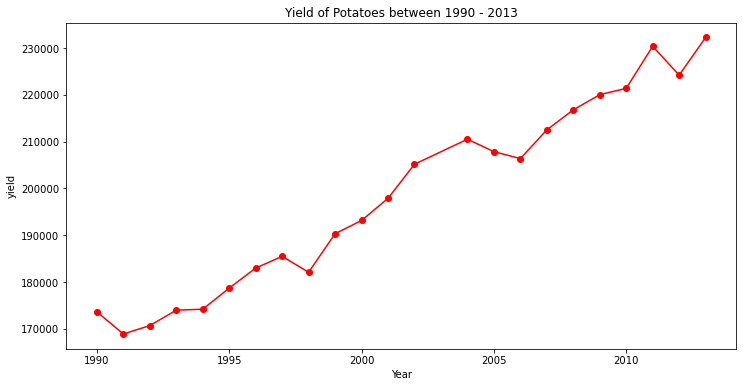

In [30]:
plot_data('Potatoes', 'yield')

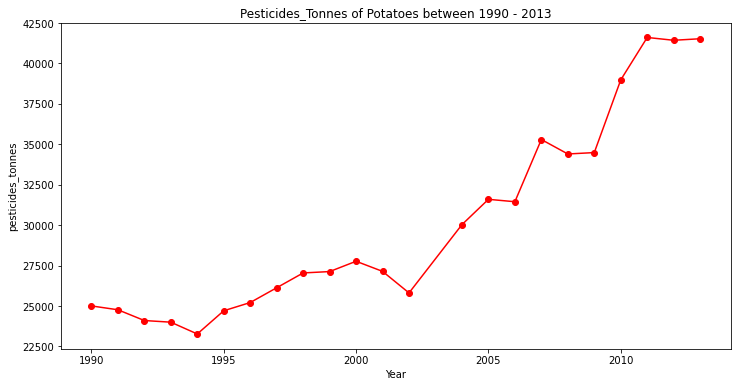

In [31]:
plot_data('Potatoes', 'pesticides_tonnes')

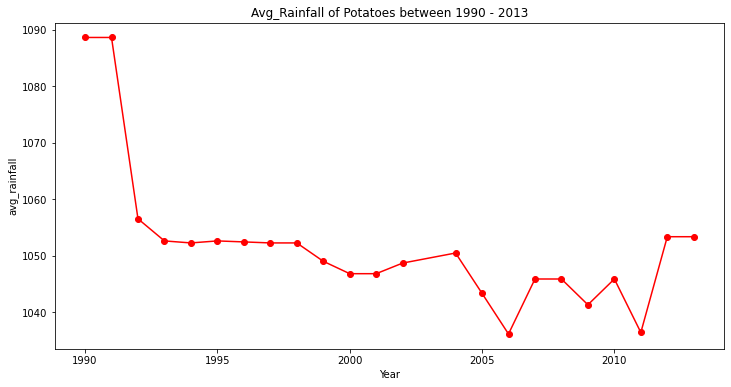

In [32]:
plot_data('Potatoes', 'avg_rainfall')

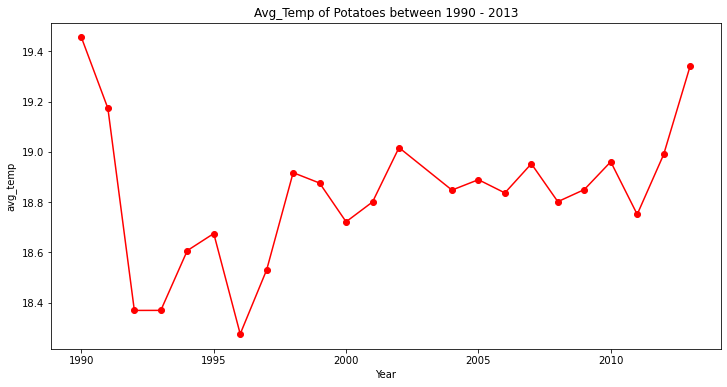

In [33]:
plot_data('Potatoes', 'avg_temp')

The above graphs show that:
- There is an upper trend in Potato production over the years, with a sharp decrease in yield in 1998 and 2006
- A significant increase in yield production was observed in 2011.
- It was also observed that as yield production increases, the use of pesticides also increases.
- An average range of temperature and rainfall observed is between 18.8 -- 19.1 and 1045 -- 1055 respectively.  

In [25]:
def top_10_producing_countries():
    potato = df[df["Crops"] == "Potatoes"]
    potato_df = potato.groupby('Country')['yield'].mean().sort_values(ascending=False).head(10)
    
    maize = df[df["Crops"] == "Maize"]
    maize_df = maize.groupby('Country')['yield'].mean().sort_values(ascending=False).head(10)
    
    rice = df[df["Crops"] == "Rice, paddy"]
    rice_df = rice.groupby('Country')['yield'].mean().sort_values(ascending=False).head(10)
    
    sorghum = df[df["Crops"] == "Sorghum"]
    sorghum_df = sorghum.groupby('Country')['yield'].mean().sort_values(ascending=False).head(10)
    
    soybeans = df[df["Crops"] == "Soybeans"]
    soybeans_df = soybeans.groupby('Country')['yield'].mean().sort_values(ascending=False).head(10)
    
    wheat = df[df["Crops"] == "Wheat"]
    wheat_df = wheat.groupby('Country')['yield'].mean().sort_values(ascending=False).head(10)
    
    cassava = df[df["Crops"] == "Cassava"]
    cassava_df = cassava.groupby('Country')['yield'].mean().sort_values(ascending=False).head(10)
    
    sweet_pot = df[df["Crops"] == "Sweet potatoes"]
    sweet_pot_df =  sweet_pot.groupby('Country')['yield'].mean().sort_values(ascending=False).head(10)
                   
    plantain = df[df["Crops"] == "Plantains and others"]
    plantain_df = plantain.groupby('Country')['yield'].mean().sort_values(ascending=False).head(10)
    
    yam = df[df["Crops"] == "Rice, paddy"]
    yam_df =  yam.groupby('Country')['yield'].mean().sort_values(ascending=False).head(10)
    
    top_countries = {'Maize' : maize_df.index, 'Potatoes': potato_df.index, 'Rice, paddy': rice_df.index, 
                 'Sorghum': sorghum_df.index, 'Soybeans': soybeans_df.index, 'Wheat': wheat_df.index,
                 'Cassava': cassava_df.index, 'Sweet potatoes': sweet_pot_df.index, 'Plantains and others': plantain_df.index, 
                 'Yams': yam_df.index}
    top_10 = pd.DataFrame(top_countries)
    return top_10

top_10_producing_countries()

,Maize,Potatoes,"Rice, paddy",Sorghum,Soybeans,Wheat,Cassava,Sweet potatoes,Plantains and others,Yams
0,Qatar,Belgium,Egypt,Austria,Italy,Belgium,India,Egypt,Guatemala,Egypt
1,Belgium,New Zealand,Australia,Italy,Turkey,Ireland,Suriname,Australia,Suriname,Australia
2,New Zealand,Netherlands,Greece,France,Egypt,Netherlands,Jamaica,Japan,El Salvador,Greece
3,Greece,United Kingdom,Spain,Algeria,Switzerland,United Kingdom,Thailand,Sudan,Jamaica,Spain
4,Chile,Switzerland,Uruguay,Egypt,Guatemala,Germany,Niger,Mexico,Kenya,Uruguay
5,Netherlands,France,Peru,Spain,Canada,Denmark,Malaysia,Greece,Peru,Peru
6,Austria,Germany,Japan,Turkey,France,France,Indonesia,Italy,Sri Lanka,Japan
7,Switzerland,Denmark,Turkey,Argentina,Austria,New Zealand,Mauritius,Spain,Honduras,Turkey
8,Spain,Australia,Italy,Croatia,Brazil,Egypt,El Salvador,Morocco,Dominican Republic,Italy
9,Italy,Sweden,El Salvador,Uruguay,Argentina,Zambia,Brazil,Senegal,Nicaragua,El Salvador


The dataframe above shows the top 10 producing countries in each crop.
- Even though India had the highest number of occurrence, it is the highest producer of Cassava
- Belgium is the highest producer of Potatoes and Wheat; it's the second highest producer of Maize
- Egypt, the only Africa country, is the highest producer of Rice, Sweet potatoes, and Yams. Top 3 in Soybeans, and in the Top 5 for Sorghhum production

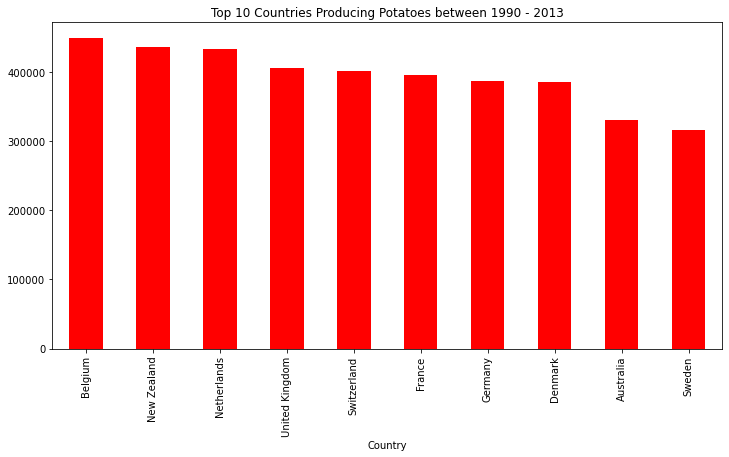

In [26]:
def top_10_countries(crop):
    crop_data = df[df["Crops"] == crop]
    graph_data = crop_data.groupby('Country')['yield'].mean().sort_values(ascending=False).head(10)
    graph_data.plot(kind = 'bar', figsize=(12,6), color='r')
    plt.xlabel("Country")
    plt.title(f'Top 10 Countries Producing {crop} between 1990 - 2013')
    plt.show()
top_10_countries("Potatoes")

- With the def function above, we can visualize the top 10 producing countries for each crops.

<Figure size 1080x864 with 0 Axes>

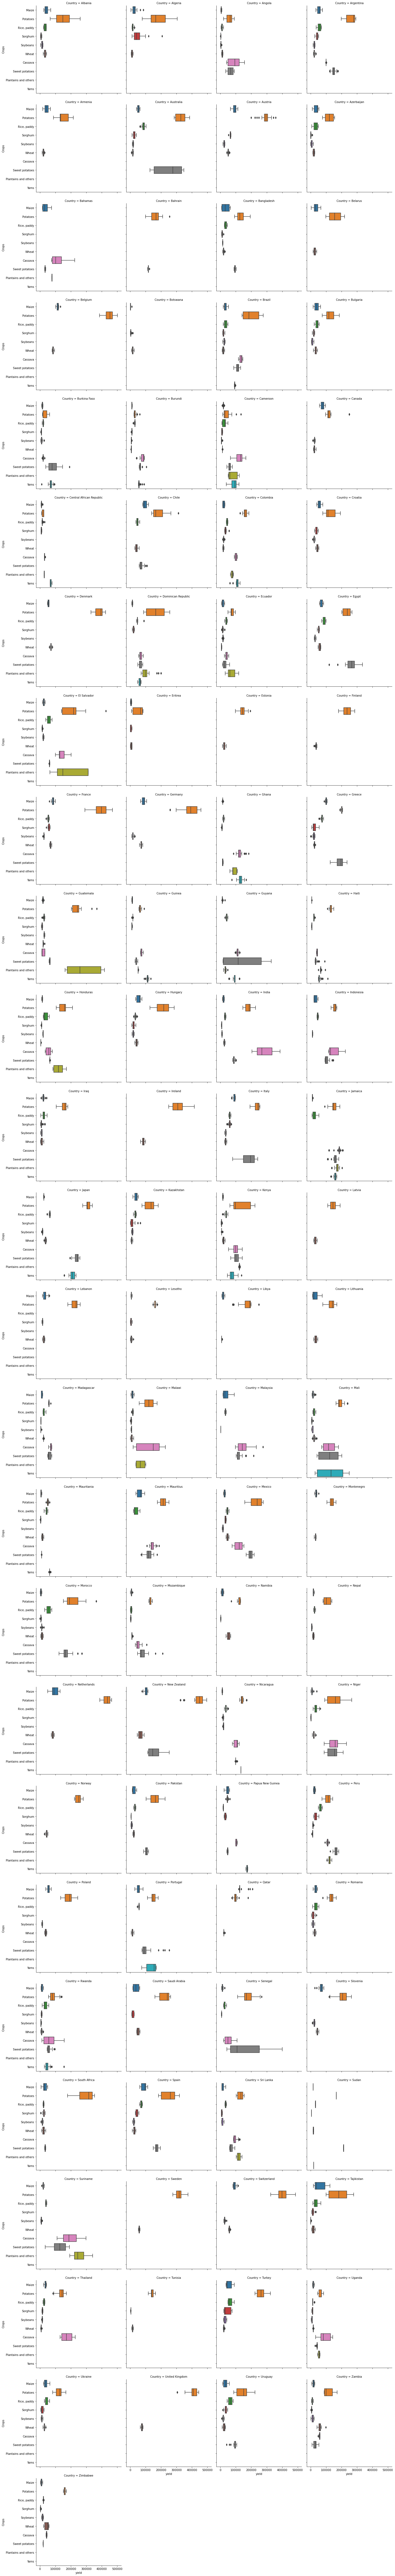

In [36]:
plt.figure(figsize=(15,12))
sns.catplot(y="Crops", x="yield", data=df, kind="box", col="Country", col_wrap=4)

The Box plot diagram above was displayed according to the country's crop. 
- It indicates that there are some outliers in some country's crop yield values.
- For example, there are outliers present in the yield values for Potato and Sorghum in Algeria
- In Argentina, outliers are present in the sweet potato and cassava yield values 
- In Austria, potatoes
- And other countries like Uruguay, Jamaica, Morocco etc.

In [13]:
#Creating a new column: Continent
Asia = ['Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'India', 'Indonesia', 'Iraq', 'Japan', 'Kazakhstan', 'Malaysia', 
        'Nepal', 'Pakistan', 'Qatar', 'Saudi Arabia', 'Sri Lanka', 'Tajikistan', 'Thailand', 'Turkey']
Africa = ['Algeria', 'Angola', 'Burkina Faso', 'Botswana', 'Burundi', 'Cameroon', 'Central African Republic', 'Egypt', 'Eritrea', 'Ghana',
       'Guinea', 'Kenya', 'Lesotho', 'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Morocco', 'Mozambique', 
       'Namibia', 'Niger', 'Rwanda', 'Senegal', 'South Africa', 'Sudan', 'Tunisia', 'Turkey', 'Uganda', 'Zambia', 'Zimbabwe'] 
Europe = ['Albania', 'Austria', 'Belarus', 'Belgium', 'Bulgaria', 'Croatia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
        'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal',
        'Romania', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom']
North_America = ['Bahamas',  'Canada', 'El Salvador', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua']
South_America = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Guyana', 'Peru', 'Suriname', 'Uruguay']
Oceania = ['Australia', 'New Zealand', 'Papua New Guinea']


Continent = []
for country in df["Country"]:
    if country in Africa:
        Continent.append("Africa")
    elif country in Asia:
        Continent.append("Asia")
    elif country in Europe:
        Continent.append("Europe") 
    elif country in North_America:
        Continent.append("North_America") 
    elif country in South_America:
        Continent.append("South_America")  
    else:
        Continent.append("Oceania")
print(len(Continent))

#Creating a new column
df["Continent"] = Continent
df.head(3)

25932


,Country,Crops,Year,yield,avg_rainfall,pesticides_tonnes,avg_temp,Continent
0,Albania,Maize,1990,36613,1485.0,121.0,16.37,Europe
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37,Europe
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37,Europe


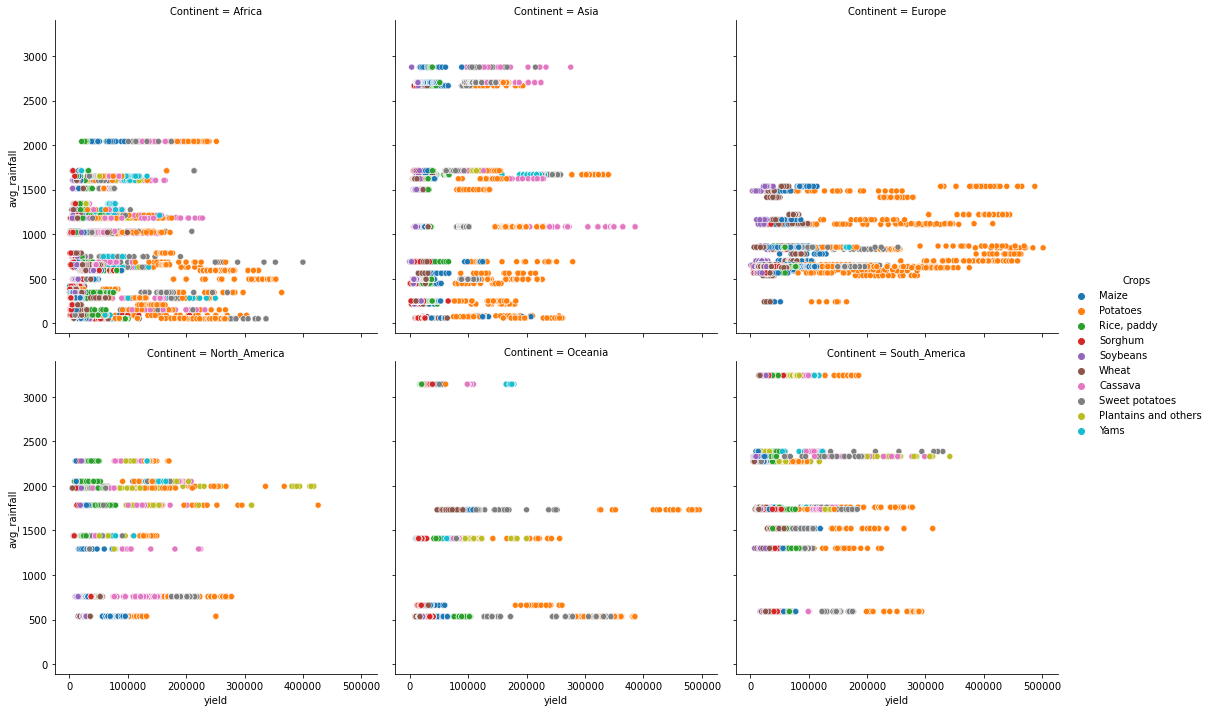

In [37]:
sns.relplot(y="avg_rainfall", x="yield", 
            data=df, kind="scatter", hue="Crops", col="Continent",
           col_wrap=3, col_order=["Africa", "Asia", "Europe", "North_America", "Oceania", "South_America"])

The above scatter plot shows that there's no linear relationship between the average rainfall and crop yield.
However, it can be observed that:
- Europe is the highest producer of potato with a rainfall that ranges between 500 to 1500
 - South America had the highest rainfall values
  - Africa has the highest yield for potato when rainfall is between 50 to 450
  - Asia has a good cassava yield when rainfall is between 50 to 

Text(0.5, 1.0, 'Crop production per continent')

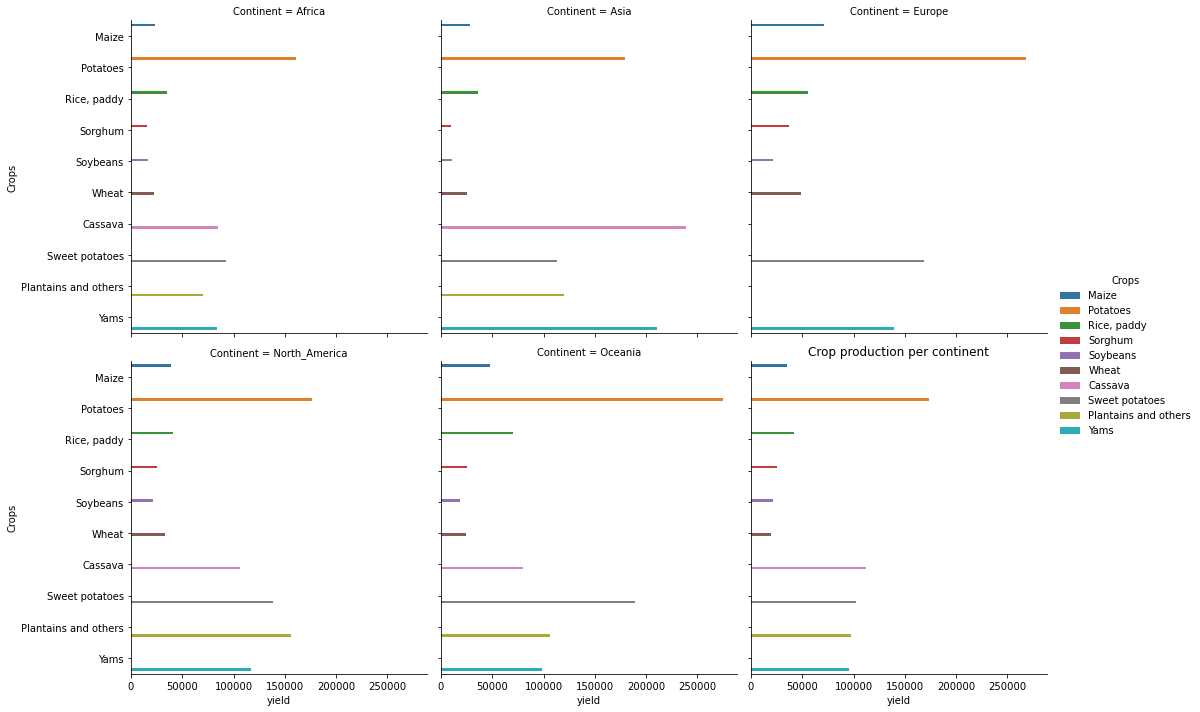

In [30]:
sns.catplot(y="Crops", x="yield", data=df, kind="bar", 
            hue="Crops", col="Continent", col_wrap=3, ci=None,
            col_order=["Africa", "Asia", "Europe", "North_America", "Oceania", "South_America"])
plt.title("Crop production per continent")

Belgium plants 3 crops. 
The crops are ['Maize' 'Potatoes' 'Wheat']


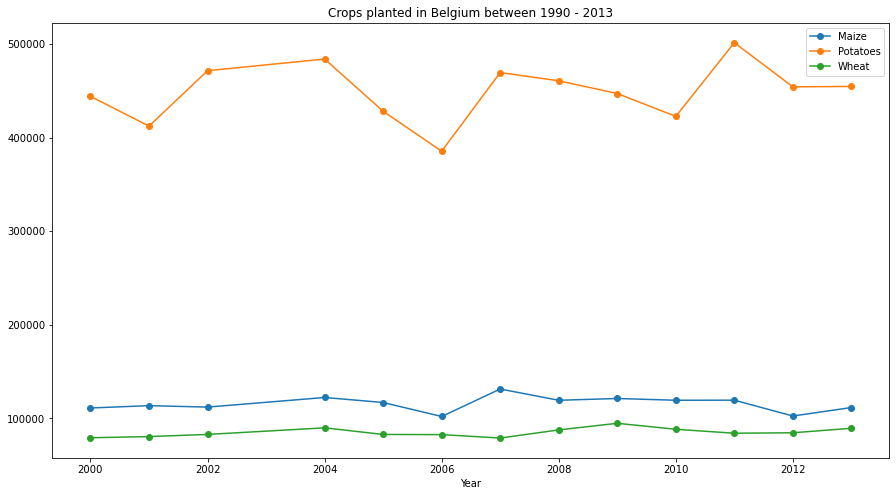

In [39]:
def country_crop(country):
    country_df = df[df["Country"] == country]
    crops = country_df["Crops"]
    print(f'{country} plants {crops.nunique()} crops. \nThe crops are {crops.unique()}')
    
    country_data = country_df.pivot_table(values="yield", columns="Crops", index="Year")
    country_data.plot(kind="line", marker = 'o', figsize=(15,8))
    
    plt.legend(loc=1)
    plt.title(f'Crops planted in {country} between 1990 - 2013')
    plt.show()
country_crop('Belgium')

The def function above displays relevant information about any country in this dataset such as:
- The number of crops being planted in the country
- The list of crops being planted
- A line plot showing the yield trends of each crop planted over the years

#### Interactive Dashboard

In [15]:
# Create continent dropdown
continent_dropdown = widgets.Dropdown(options=sorted(df['Continent'].unique()), description='Continent:', value=None)


# Create country dropdown (initially empty)
country_dropdown = widgets.Dropdown(options=[], description='Country:', value=None)

# Function to update countries based on continent
def update_country_dropdown(*args):
    selected_continent = continent_dropdown.value
    if selected_continent:
        filtered_countries = df[df['Continent'] == selected_continent]['Country'].unique()
        country_dropdown.options = sorted(filtered_countries)
    else:
        country_dropdown.options = []

# Observe changes to continent dropdown
continent_dropdown.observe(update_country_dropdown, names='value')

# Create crop dropdown (initially empty)
crops_dropdown = widgets.Dropdown(options=[], description='Crops:', value=None)

#Function to update crops based on the countries
def update_crops_dropdown(*args):
    selected_country = country_dropdown.value
    if selected_country:
        filtered_crop = df[df['Country'] == selected_country]['Crops'].unique()
        crops_dropdown.options = sorted(filtered_crop)
    else:
        crops_dropdown.options = []

# Observe changes to continent dropdown
country_dropdown.observe(update_crops_dropdown, names='value')



#Function to plot data
def plot_data(continent, country, crop):
    fig, ax = plt.subplots(figsize=(12,6))
    
    p_df = df[(df['Continent'] == continent) & (df['Country'] == country) & (df['Crops'] == crop)]
    
    ax.plot(p_df['Year'], p_df['yield'], marker = 'v', label="yield")
    ax.plot(p_df['Year'], p_df['pesticides_tonnes'], marker = 'o', label='pesticides')
    plt.title(f'Average {crop} Yield and Pesticide Usage in {country}')
    plt.xlabel('Year')
    plt.ylabel('Yield(hg/ha) or Pesticides Usage(tons)')
    plt.grid(True)
    plt.legend()
    plt.show()
   
    
# Use interactive function to automatically update the plot
widgets.interactive(plot_data, continent=continent_dropdown, country=country_dropdown, crop=crops_dropdown)

interactive(children=(Dropdown(description='Continent:', options=('Africa', 'Asia', 'Europe', 'North_America',…

The interactive dashboard uses a dropdown technique to visualization the relationship between Crop Yield and Pesticide Usage of selected continents, country, and crops over the years.
- For example, Albania (in Europe) has an upward trend in maize production. As the pesticide usage increases, the maize yield also increases.

## Model Building and Evaluation

In [40]:
#Splitting dataset into dependent and independent variables
X = df.drop(columns=["yield", "Continent"])
y = df['yield']
X.shape, y.shape

((25932, 6), (25932,))

In [41]:
#Instatianting standard scaler
scaler = StandardScaler()

#scaling the independent variables
X_scaled = scaler.fit_transform(X[['avg_rainfall', 'pesticides_tonnes', 'avg_temp']])
X_scaled_df = pd.DataFrame(X_scaled, 
                           columns = ['avg_rainfall', 'pesticides_tonnes', 'avg_temp'],
                          index = X.index)
X_scaled_df.head()

,avg_rainfall,pesticides_tonnes,avg_temp
0,0.471388,-0.605681,-0.629302
1,0.471388,-0.605681,-0.629302
2,0.471388,-0.605681,-0.629302
3,0.471388,-0.605681,-0.629302
4,0.471388,-0.605681,-0.629302


In [42]:
#Instantiating OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse=False)

#Transforming categorial variables into ordinal variables
X_cat = ohe.fit_transform(X[['Country', 'Crops']])
X_cat_df = pd.DataFrame(X_cat, 
                        columns = ohe.get_feature_names_out(['Country', 'Crops']),
                        index = X.index)
X_cat_df.head()

,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,Country_Bahrain,Country_Bangladesh,...,Country_Zimbabwe,Crops_Maize,Crops_Plantains and others,Crops_Potatoes,"Crops_Rice, paddy",Crops_Sorghum,Crops_Soybeans,Crops_Sweet potatoes,Crops_Wheat,Crops_Yams
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [43]:
#Combining the dataset 
X_processed_df = pd.concat([X_scaled_df, X_cat_df, X["Year"]], axis = 1)

X_processed_df.head(2)

,avg_rainfall,pesticides_tonnes,avg_temp,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,...,Crops_Maize,Crops_Plantains and others,Crops_Potatoes,"Crops_Rice, paddy",Crops_Sorghum,Crops_Soybeans,Crops_Sweet potatoes,Crops_Wheat,Crops_Yams,Year
0,0.471388,-0.605681,-0.629302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1990
1,0.471388,-0.605681,-0.629302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1990


In [44]:
#Splitting dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.3, random_state=14)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((18152, 113), (18152,), (7780, 113), (7780,))

In [21]:
## Building a dumb model: Baseline
y_mean = y_train.mean()
y_mean

77324.55018730718

In [22]:
y_pred_baseline = [y_mean] * len(y_train)
len(y_pred_baseline) == len(y_train)

True

In [23]:
mae_baseline = round(mean_absolute_error(y_train, y_pred_baseline), 2)
mae_baseline

64377.87

In [45]:
#Instantiate models
models = {
         "Linear Regression" : LinearRegression(),
         "KNN" : KNeighborsRegressor(),
         "Decision Tree" : DecisionTreeRegressor(random_state=14),
         "Random Forest" : RandomForestRegressor(random_state=14),
         "Ada Boost" : AdaBoostRegressor(random_state=14),
         "Gradient Boost" : GradientBoostingRegressor(random_state=14),
         "XGBoost" : XGBRegressor(random_state=14),
         "Bagging Regression" : BaggingRegressor(random_state=14)
         }
#Store metrics
result = []

#Training models and evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** (1/2)
    r2 = r2_score(y_test, y_pred)
    
    result.append({
                    "Model" : name,
                    "MAE" : mae,
                    "MSE" : mse,
                    "RMSE" : rmse,
                    "r2_score" : r2
    })
    
result_df = pd.DataFrame(result)
result_df

,Model,MAE,MSE,RMSE,r2_score
0,Linear Regression,29758.750400,1.758009e+09,41928.617999,0.744044
1,KNN,20850.248535,1.325094e+09,36401.841768,0.807074
2,Decision Tree,4210.083676,1.620676e+08,12730.579243,0.976404
3,Random Forest,3990.916527,9.558645e+07,9776.832281,0.986083
4,Ada Boost,48631.875525,3.544348e+09,59534.424345,0.483964
5,Gradient Boost,24635.984090,1.590768e+09,39884.436420,0.768394
6,XGBoost,8806.376554,2.372690e+08,15403.537099,0.965455
7,Bagging Regression,4295.898175,1.119935e+08,10582.696110,0.983694


- Random Forest had the best performance in all categories r2_score, mean absolute error, etc

### Hyperparameter tuning

Performing hyperparameter tuning on Random Forest for a better performance using Grid search

In [ ]:
rf = RandomForestRegressor(random_state=14)
params_rf = {"n_estimators" : range(100, 200, 25),
             "max_depth" : range(30, 60, 10)}

#br = BaggingRegressor(random_state=14)
#params_br = {"base_estimator" : [RandomForestRegressor()],
 #           "n_estimators" : range(100, 200, 25)}

In [25]:
model_hyp = GridSearchCV(rf, param_grid = params_rf, cv = 5, scoring = 'r2', 
                         error_score = 1, n_jobs = -1, verbose = 1)

model_hyp.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, error_score=1,
             estimator=RandomForestRegressor(random_state=14), n_jobs=-1,
             param_grid={'max_depth': range(30, 60, 10),
                         'n_estimators': range(100, 200, 25)},
             scoring='r2', verbose=1)

In [48]:
print(model_hyp.best_params_)
print(model_hyp.best_score_)
best_rf_model = model_hyp.best_estimator_
best_rf_model

{'max_depth': 50, 'n_estimators': 175}
0.9826357422646174


RandomForestRegressor(max_depth=50, n_estimators=175, random_state=14)

In [49]:
y_pred_hyp = best_rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_hyp)
r2 = r2_score(y_test, y_pred_hyp)

print(f'Random Forest has a MAE = {mae} and r2_score = {r2}')

Random Forest has a MAE = 3987.6971701314255 and r2_score = 0.9861878697561625


After the hyperparameter tuning, the model had a better performance

Text(0.5, 1.0, 'Top 10 Important Features')

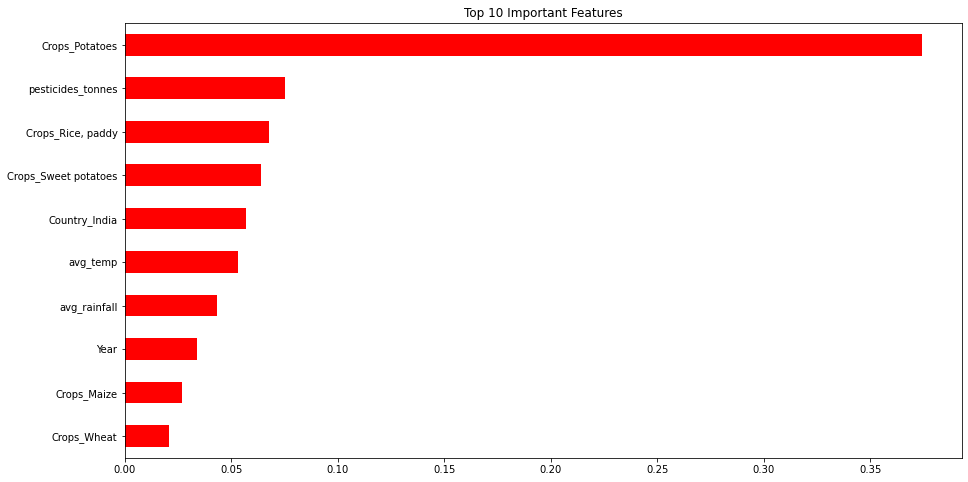

In [62]:
importance = best_rf_model.feature_importances_
feat_imp = pd.Series(importance, index = X_processed_df.columns)
feat_imp.sort_values(ascending = True).tail(10).plot(kind = "barh", figsize=(15,8), color = 'r')
plt.title("Top 10 Important Features")

In [63]:
def model_hyp(model, params):
    hyp_model = GridSearchCV(model, param_grid=params, cv=5, scoring = 'r2', error_score=1, n_jobs=-1, verbose=1)
    hyp_model.fit(X_train, y_train)

    print(hyp_model.best_params_)
    print(hyp_model.best_score_)
    print(hyp_model.best_estimator_)
    
    y_pred = hyp_model.best_estimator_.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return(f"The {model} has a MAE = {mae} and r2 = {r2}")

In [ ]:
model_hyp(br, params_br)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
